In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
most_recent_date.date

'2017-08-23'

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_data = session.query(Measurement).order_by(Measurement.date.desc()).first()
most_recent_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1de5c592eb8>,
 'prcp': 0.0,
 'date': '2017-08-23',
 'tobs': 81.0,
 'station': 'USC00519397',
 'id': 2724}

In [31]:
# Calculate the date one year from the last date in data set.
date_12months_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365
date_12months_ago

datetime.date(2016, 8, 23)

In [108]:
# Perform a query to retrieve the data and precipitation scores
last_12months_data = session.query(Measurement.date, Measurement.prcp).\
                     filter(Measurement.date >= date_12months_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

last_12_months_df = pd.DataFrame(last_12months_data)
last_12_months_df.set_index('date' , inplace=True)
last_12_months_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [109]:
# Sort the dataframe by date
last_12_months_df = last_12_months_df.sort_values(by= 'date')
last_12_months_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<AxesSubplot:xlabel='date'>

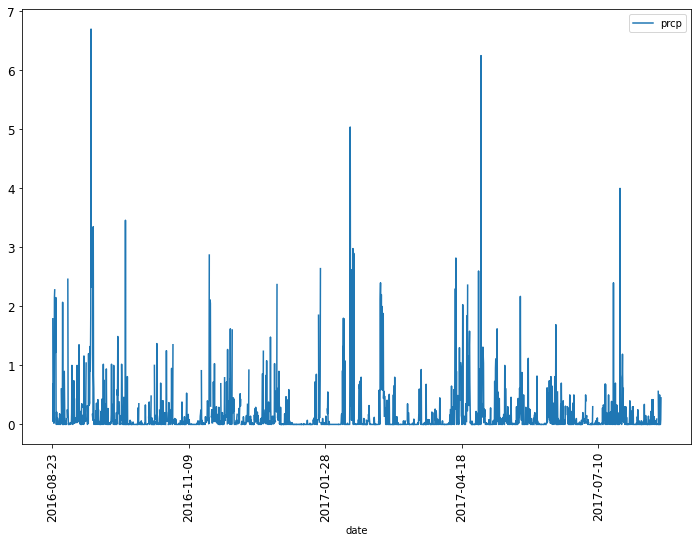

In [119]:
# Use Pandas Plotting with Matplotlib to plot the data
last_12_months_df.plot( y = 'prcp', figsize = (12,8) , rot =90 , fontsize = 12 , lab)


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()